# Take Home 7 - Deep Learning

In [133]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from sklearn import linear_model, decomposition, preprocessing,metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [134]:
fname = join(os.getcwd(),'data','data3SS2009.mat')
mat_contents = sio.loadmat(fname)
dataset = mat_contents['dataset']
N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases
y = mat_contents['labels'].reshape(Nc)

Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

X1=[]
for i in range(0,850): # a regressão é realizada para extrair características de cada experimento, por isto são realizadas a extração de características 850 vezes
    pAR2 = AutoReg(Ch2[:,i], lags = 30).fit()
    pAR3 = AutoReg(Ch3[:,i], lags = 30).fit()
    pAR4 = AutoReg(Ch4[:,i], lags = 30).fit()
    pAR5 = AutoReg(Ch5[:,i], lags = 30).fit()
    result=np.concatenate([pAR2.params,pAR3.params,pAR4.params,pAR5.params])
    X1.append(result)

pca = PCA().fit(X1)
pca = decomposition.PCA(n_components=0.97) #variancia explicada 97%
X2 = pca.fit_transform(X1)
Nc,PCAcomp=X2.shape 

scaler = MinMaxScaler(feature_range=(-1,1))
X=scaler.fit_transform(X2)

indDam = y>9
df=pd.concat([pd.DataFrame(X),pd.DataFrame({'label':indDam})],axis=1)
#df=df.replace(False,0)
#df=df.replace(True,1)



In [135]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=i)
# Model / data parameters
num_classes = 18
input_shape = (28, 28, 1)

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (510, 7, 1)
y_train shape: (510,)
510 train samples
340 test samples


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 7)                 0         
                                                                 
 dense_89 (Dense)            (None, 60)                480       
                                                                 
 dense_90 (Dense)            (None, 18)                1098      
                                                                 
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
13/15 [=========================>....] - ETA: 0s - loss: 2.8027 - accuracy: 0.0529

2022-05-22 10:12:51.589434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 18ms/step - loss: 2.7966 - accuracy: 0.0675 - val_loss: 2.7265 - val_accuracy: 0.1569
Epoch 2/6
15/15 [==============================] - 0s 9ms/step - loss: 2.6911 - accuracy: 0.2810 - val_loss: 2.6396 - val_accuracy: 0.4706


2022-05-22 10:12:51.866033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/6
15/15 [==============================] - 0s 9ms/step - loss: 2.5872 - accuracy: 0.5098 - val_loss: 2.5506 - val_accuracy: 0.5686
Epoch 4/6
15/15 [==============================] - 0s 10ms/step - loss: 2.4804 - accuracy: 0.6427 - val_loss: 2.4539 - val_accuracy: 0.6471
Epoch 5/6
15/15 [==============================] - 0s 11ms/step - loss: 2.3647 - accuracy: 0.7124 - val_loss: 2.3500 - val_accuracy: 0.6667
Epoch 6/6
11/11 [==============================] - 0s 8ms/step - loss: 2.1910 - accuracy: 0.7059
Test loss: 2.1909611225128174
Test accuracy: 0.7058823704719543
11/11 [==============================] - 0s 10ms/step
(340, 18)


2022-05-22 10:12:52.795097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


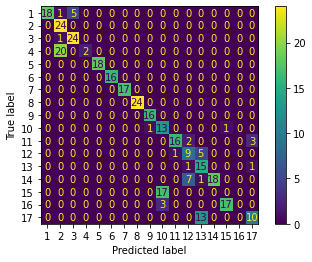

In [147]:
model = keras.Sequential([
  layers.Flatten(input_shape=(7,1)),
  layers.Dense(60, activation='relu'),
  layers.Dense(18, activation="softmax")
])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    x_train, 
    y_train,
    epochs=6,
    validation_split=0.1,
)

score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

yh_test = model.predict(x_test)
print(y_test.shape)
# convert from probability to classes
y_test  = np.argmax(y_test, 1)
yh_test = np.argmax(yh_test, 1)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

CM = confusion_matrix(y_test,yh_test)
ConfusionMatrixDisplay.from_predictions(y_test, yh_test)

plt.show()